# Задание 3

In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../data/out/income_by_source.xlsx')


def make_sql(platform):
    sql = f"""
        SELECT '{platform}' AS OS,
            SUM({platform}) AS сумма_дохода,
            (SELECT SUM(Android + IOS + Web) FROM platform_data) AS общая_сумма_дохода,
            ROUND((SUM({platform}) * 100.0) / (SELECT SUM(Android + IOS + Web) FROM platform_data), 2) AS "процент от всего дохода"
        FROM platform_data
    """
    return sql

os = ["Android", "IOS", "Web"]
queries = [make_sql(p) for p in os]
end_sql = " UNION ALL ".join(queries)

```  sql
SELECT 'Android' AS OS,
    SUM(Android) AS сумма_дохода,
    (SELECT SUM(Android + IOS + Web) FROM platform_data) AS общая_сумма_дохода,
    ROUND((SUM(Android) * 100.0) / (SELECT SUM(Android + IOS + Web) FROM platform_data), 2) AS "процент от всего дохода"
FROM platform_data
     UNION ALL 
SELECT 'IOS' AS OS,
    SUM(IOS) AS сумма_дохода,
    (SELECT SUM(Android + IOS + Web) FROM platform_data) AS общая_сумма_дохода,
    ROUND((SUM(IOS) * 100.0) / (SELECT SUM(Android + IOS + Web) FROM platform_data), 2) AS "процент от всего дохода"
FROM platform_data
     UNION ALL 
SELECT 'Web' AS OS,
    SUM(Web) AS сумма_дохода,
    (SELECT SUM(Android + IOS + Web) FROM platform_data) AS общая_сумма_дохода,
    ROUND((SUM(Web) * 100.0) / (SELECT SUM(Android + IOS + Web) FROM platform_data), 2) AS "процент от всего дохода"
FROM platform_data
```

In [35]:
with sqlite3.connect('income_by_source.db') as conn:
    df.to_sql('platform_data', conn, index = False, if_exists = 'replace')
    result = pd.read_sql(end_sql, conn)

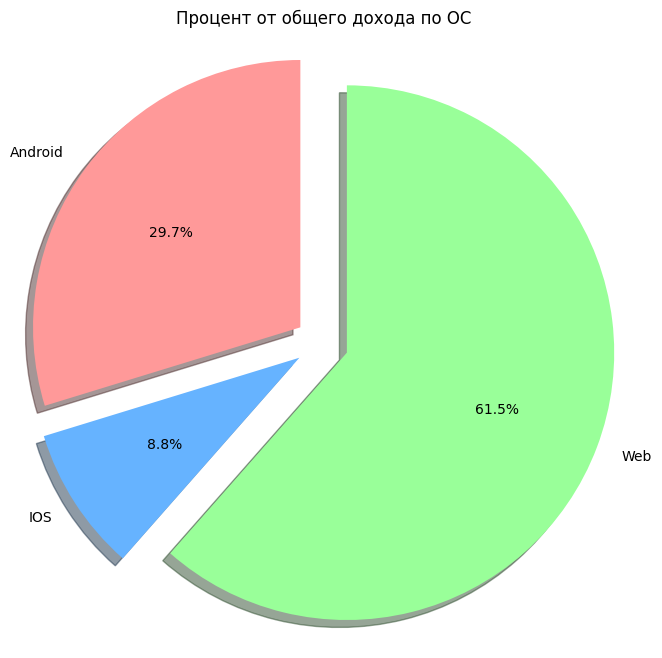

In [36]:

sizes = [29.74, 8.77, 61.49]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0.1)  # Вырвем сегмент

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
        sizes,
        explode=explode,
        labels = os,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90
    )

plt.title('Процент от общего дохода по ОС')
plt.axis('equal')  # Равные оси для правильного отображения круга
plt.show()
